<a href="https://colab.research.google.com/github/AjalaSunday/Neural-Networks-Fall-2021/blob/main/Artificial_Neural_Network_Implementation_for_Image_Classification_using_CIFAR_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPROCESSING**

170508288/170498071 [==============================] - 3s 0us/step


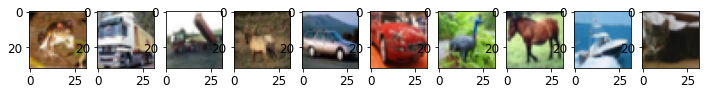

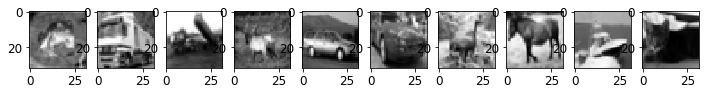

In [1]:
# Importing all requisite libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import regularizers
from keras import Sequential
import matplotlib

# Specify plot label tick size
matplotlib.rc("xtick", labelsize=12)
matplotlib.rc("ytick", labelsize=12)

# Loading the CIFAR10 training and test data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Plotting first 10 images in dataset
fig, axes = plt.subplots(1,10,figsize=(12,6))
for img,ax in zip(x_train[:10], axes):
  ax.imshow(img)
plt.show()


# Converting the training and test data to float32
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


# Normalizing the training and test data from 0-1.0
x_train/=255.0
x_test/=255.0


# Define function to convert test and training data to gray scale
def grayscale(data, dtype='float32'):

  # luma coding weighted average in video systems
  r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
  rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
  
  # add channel dimension
  rst = np.expand_dims(rst, axis=3) 
  return rst


# Convert training and test data to grayscale
X_train_gray = grayscale(x_train) 
X_test_gray = grayscale(x_test)


# Plot 10 images in gray scale to confirm conversion
fig, axes = plt.subplots(1,10,figsize=(12,6))
for img,ax in zip(X_train_gray[:10], axes):
  ax.imshow(img[:,:,0],cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

**8-LAYER ANN WITH 512 NEURONS IN EACH LAYER**

Epoch 1/20
313/313 [==============================] - 18s 53ms/step - loss: 2.1124 - accuracy: 0.2035 - val_loss: 2.0739 - val_accuracy: 0.2340
Epoch 2/20
313/313 [==============================] - 16s 52ms/step - loss: 2.0016 - accuracy: 0.2659 - val_loss: 2.0125 - val_accuracy: 0.2639
Epoch 3/20
313/313 [==============================] - 17s 53ms/step - loss: 1.9430 - accuracy: 0.2977 - val_loss: 1.9440 - val_accuracy: 0.2910
Epoch 4/20
313/313 [==============================] - 16s 52ms/step - loss: 1.8985 - accuracy: 0.3137 - val_loss: 1.8674 - val_accuracy: 0.3243
Epoch 5/20
313/313 [==============================] - 16s 53ms/step - loss: 1.8579 - accuracy: 0.3280 - val_loss: 1.8514 - val_accuracy: 0.3301
Epoch 6/20
313/313 [==============================] - 16s 52ms/step - loss: 1.8295 - accuracy: 0.3394 - val_loss: 1.8436 - val_accuracy: 0.3371
Epoch 7/20
313/313 [==============================] - 16s 52ms/step - loss: 1.7866 - accuracy: 0.3555 - val_loss: 1.7876 - val_accuracy:

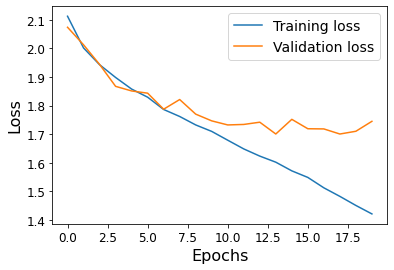

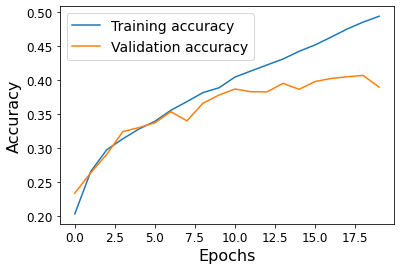

In [2]:
# Define ANN with 8 hidden layers 10-unit output layer
model=Sequential([
                  keras.layers.Flatten(input_shape=(32,32,1)),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dense(10, activation='softmax')
])


# Configure ANN optimzer, objective function and metrics to be evaluated
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train model using 20 epochs, batch size of 128 and 20% validation data
history=model.fit(X_train_gray, y_train, batch_size=128, epochs=20,validation_split=0.2)


# Evaluate model against test data
test_loss, test_acc = model.evaluate(X_test_gray, y_test, verbose=2)
print(f'\n Test accuracy: {test_acc}')


# Compare training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss', 'Validation loss'], fontsize=14)
plt.savefig("loss_vs_epoch.pdf")
plt.show()



# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=14)
plt.savefig("accuracy_vs_epoch.pdf")
plt.show()


**4-LAYER MODEL WITH REDUCING NEURONS WITH LAYERS**

Epoch 1/20
313/313 [==============================] - 6s 17ms/step - loss: 2.0858 - accuracy: 0.2294 - val_loss: 1.9776 - val_accuracy: 0.2844
Epoch 2/20
313/313 [==============================] - 5s 15ms/step - loss: 1.9542 - accuracy: 0.2933 - val_loss: 1.9313 - val_accuracy: 0.3061
Epoch 3/20
313/313 [==============================] - 5s 15ms/step - loss: 1.8847 - accuracy: 0.3230 - val_loss: 1.8513 - val_accuracy: 0.3361
Epoch 4/20
313/313 [==============================] - 5s 15ms/step - loss: 1.8337 - accuracy: 0.3426 - val_loss: 1.8329 - val_accuracy: 0.3507
Epoch 5/20
313/313 [==============================] - 5s 15ms/step - loss: 1.7873 - accuracy: 0.3622 - val_loss: 1.7752 - val_accuracy: 0.3627
Epoch 6/20
313/313 [==============================] - 5s 15ms/step - loss: 1.7551 - accuracy: 0.3769 - val_loss: 1.7642 - val_accuracy: 0.3684
Epoch 7/20
313/313 [==============================] - 5s 15ms/step - loss: 1.7259 - accuracy: 0.3834 - val_loss: 1.7837 - val_accuracy: 0.3710

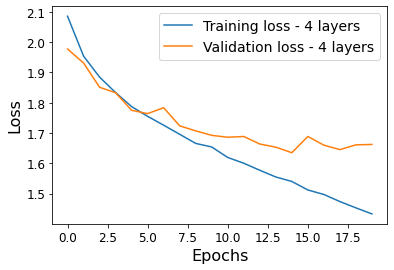

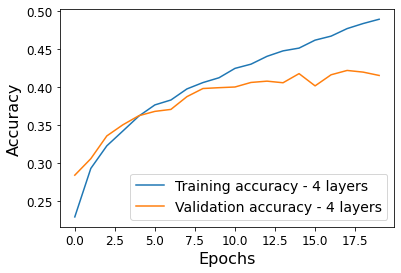

In [3]:
# Modelling a 4-layer ANN with reducing number of neurons with layers
model_4=Sequential([
                  keras.layers.Flatten(input_shape=(32,32,1)),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dense(256, activation='relu'),
                  keras.layers.Dense(64, activation='relu'),
                  keras.layers.Dense(32, activation='relu'),
                  keras.layers.Dense(10, activation='softmax')
])


# Configure ANN optimzer, objective function and metrics to be evaluated
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train model using 20 epochs, batch size of 128 and 20% validation data
history_4=model_4.fit(X_train_gray, y_train, batch_size=128, epochs=20,validation_split=0.2)


# Evaluate model against test data
test_loss_4, test_acc_4 = model_4.evaluate(X_test_gray, y_test, verbose=2)
print(f'\n Test accuracy: {test_acc_4}')



# Compare training and validation loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss - 4 layers', 'Validation loss - 4 layers'], fontsize=14)
plt.savefig("loss_vs_epoch_4.pdf")
plt.show()



# Plot training and validation accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy - 4 layers', 'Validation accuracy - 4 layers'], fontsize=14)
plt.savefig("accuracy_vs_epoch_4.pdf")
plt.show()



**WEIGHT DECAY WITH L2-NORM REGULARIZATION**



Epoch 1/20
313/313 [==============================] - 6s 18ms/step - loss: 2.2404 - accuracy: 0.2292 - val_loss: 2.0886 - val_accuracy: 0.2840
Epoch 2/20
313/313 [==============================] - 5s 18ms/step - loss: 2.0423 - accuracy: 0.2908 - val_loss: 2.0259 - val_accuracy: 0.3053
Epoch 3/20
313/313 [==============================] - 5s 18ms/step - loss: 1.9649 - accuracy: 0.3163 - val_loss: 1.9470 - val_accuracy: 0.3211
Epoch 4/20
313/313 [==============================] - 6s 18ms/step - loss: 1.9224 - accuracy: 0.3302 - val_loss: 1.8984 - val_accuracy: 0.3377
Epoch 5/20
313/313 [==============================] - 6s 18ms/step - loss: 1.8726 - accuracy: 0.3517 - val_loss: 1.8736 - val_accuracy: 0.3457
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 1.8419 - accuracy: 0.3621 - val_loss: 1.8610 - val_accuracy: 0.3508
Epoch 7/20
313/313 [==============================] - 6s 18ms/step - loss: 1.8042 - accuracy: 0.3745 - val_loss: 1.8302 - val_accuracy: 0.3723

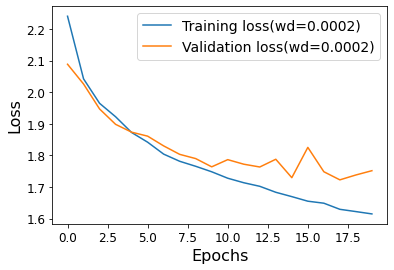

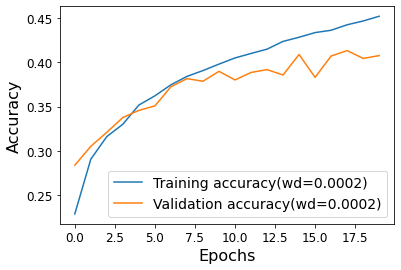

Epoch 1/20
313/313 [==============================] - 6s 18ms/step - loss: 2.3415 - accuracy: 0.2174 - val_loss: 2.1624 - val_accuracy: 0.2643
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 2.0718 - accuracy: 0.2903 - val_loss: 2.0354 - val_accuracy: 0.2957
Epoch 3/20
313/313 [==============================] - 6s 18ms/step - loss: 1.9795 - accuracy: 0.3156 - val_loss: 1.9455 - val_accuracy: 0.3318
Epoch 4/20
313/313 [==============================] - 6s 18ms/step - loss: 1.9263 - accuracy: 0.3356 - val_loss: 1.8952 - val_accuracy: 0.3466
Epoch 5/20
313/313 [==============================] - 6s 18ms/step - loss: 1.8938 - accuracy: 0.3495 - val_loss: 1.8842 - val_accuracy: 0.3497
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 1.8626 - accuracy: 0.3629 - val_loss: 1.8928 - val_accuracy: 0.3486
Epoch 7/20
313/313 [==============================] - 6s 18ms/step - loss: 1.8398 - accuracy: 0.3712 - val_loss: 1.8548 - val_accuracy: 0.3667

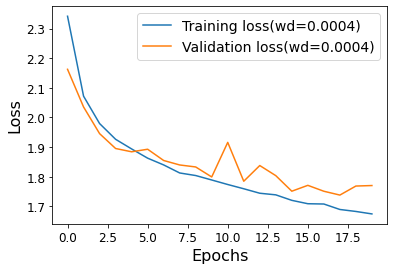

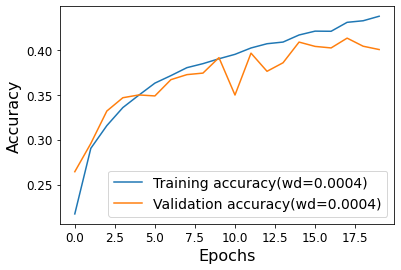

Epoch 1/20
313/313 [==============================] - 7s 19ms/step - loss: 2.3767 - accuracy: 0.2240 - val_loss: 2.1582 - val_accuracy: 0.2552
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 2.0809 - accuracy: 0.2870 - val_loss: 2.0374 - val_accuracy: 0.2988
Epoch 3/20
313/313 [==============================] - 6s 18ms/step - loss: 2.0072 - accuracy: 0.3058 - val_loss: 2.0120 - val_accuracy: 0.2985
Epoch 4/20
313/313 [==============================] - 6s 18ms/step - loss: 1.9605 - accuracy: 0.3207 - val_loss: 1.9428 - val_accuracy: 0.3264
Epoch 5/20
313/313 [==============================] - 6s 18ms/step - loss: 1.9152 - accuracy: 0.3404 - val_loss: 1.8897 - val_accuracy: 0.3524
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 1.8869 - accuracy: 0.3478 - val_loss: 1.8733 - val_accuracy: 0.3555
Epoch 7/20
313/313 [==============================] - 6s 18ms/step - loss: 1.8606 - accuracy: 0.3603 - val_loss: 1.8431 - val_accuracy: 0.3696

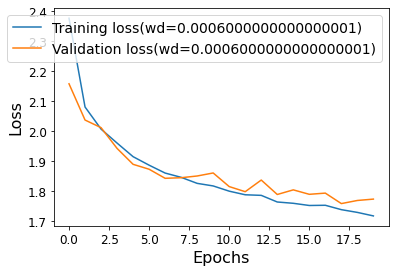

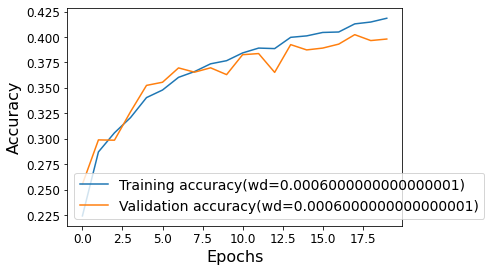

Epoch 1/20
313/313 [==============================] - 7s 19ms/step - loss: 2.4513 - accuracy: 0.2176 - val_loss: 2.1637 - val_accuracy: 0.2575
Epoch 2/20
313/313 [==============================] - 6s 19ms/step - loss: 2.0859 - accuracy: 0.2865 - val_loss: 2.0333 - val_accuracy: 0.2927
Epoch 3/20
313/313 [==============================] - 6s 18ms/step - loss: 2.0113 - accuracy: 0.3090 - val_loss: 1.9943 - val_accuracy: 0.3073
Epoch 4/20
313/313 [==============================] - 6s 19ms/step - loss: 1.9719 - accuracy: 0.3178 - val_loss: 1.9402 - val_accuracy: 0.3277
Epoch 5/20
313/313 [==============================] - 6s 19ms/step - loss: 1.9328 - accuracy: 0.3340 - val_loss: 1.9152 - val_accuracy: 0.3403
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 1.9011 - accuracy: 0.3462 - val_loss: 1.8854 - val_accuracy: 0.3558
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 1.8884 - accuracy: 0.3549 - val_loss: 1.9025 - val_accuracy: 0.3479

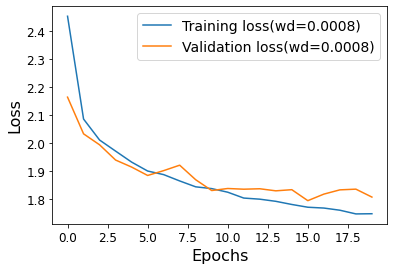

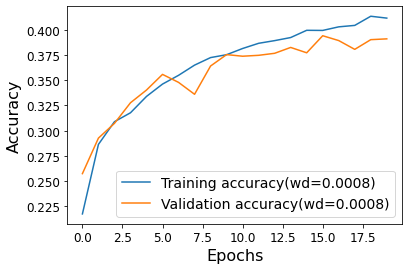

Epoch 1/20
313/313 [==============================] - 7s 19ms/step - loss: 2.4819 - accuracy: 0.2304 - val_loss: 2.1981 - val_accuracy: 0.2700
Epoch 2/20
313/313 [==============================] - 6s 19ms/step - loss: 2.1185 - accuracy: 0.2890 - val_loss: 2.0777 - val_accuracy: 0.2969
Epoch 3/20
313/313 [==============================] - 6s 19ms/step - loss: 2.0316 - accuracy: 0.3099 - val_loss: 2.0232 - val_accuracy: 0.3087
Epoch 4/20
313/313 [==============================] - 6s 18ms/step - loss: 1.9913 - accuracy: 0.3197 - val_loss: 1.9844 - val_accuracy: 0.3144
Epoch 5/20
313/313 [==============================] - 6s 19ms/step - loss: 1.9543 - accuracy: 0.3312 - val_loss: 1.9410 - val_accuracy: 0.3331
Epoch 6/20
313/313 [==============================] - 6s 19ms/step - loss: 1.9214 - accuracy: 0.3433 - val_loss: 1.9277 - val_accuracy: 0.3403
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 1.8970 - accuracy: 0.3550 - val_loss: 1.9063 - val_accuracy: 0.3536

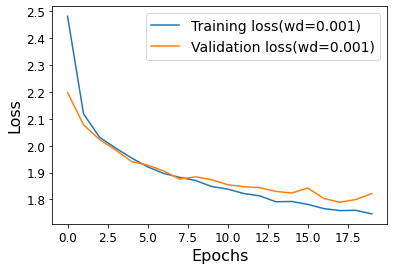

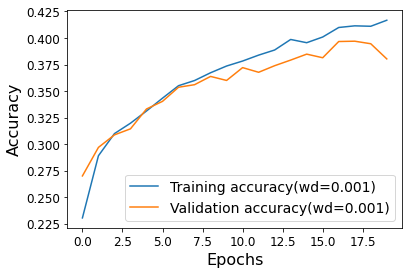

Epoch 1/20
313/313 [==============================] - 7s 20ms/step - loss: 2.5738 - accuracy: 0.2157 - val_loss: 2.2105 - val_accuracy: 0.2597
Epoch 2/20
313/313 [==============================] - 6s 19ms/step - loss: 2.1204 - accuracy: 0.2867 - val_loss: 2.0498 - val_accuracy: 0.3068
Epoch 3/20
313/313 [==============================] - 6s 19ms/step - loss: 2.0346 - accuracy: 0.3062 - val_loss: 1.9872 - val_accuracy: 0.3239
Epoch 4/20
313/313 [==============================] - 6s 19ms/step - loss: 1.9868 - accuracy: 0.3221 - val_loss: 1.9679 - val_accuracy: 0.3284
Epoch 5/20
313/313 [==============================] - 6s 19ms/step - loss: 1.9534 - accuracy: 0.3353 - val_loss: 1.9561 - val_accuracy: 0.3295
Epoch 6/20
313/313 [==============================] - 6s 19ms/step - loss: 1.9262 - accuracy: 0.3444 - val_loss: 1.9205 - val_accuracy: 0.3440
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 1.9092 - accuracy: 0.3510 - val_loss: 1.9275 - val_accuracy: 0.3453

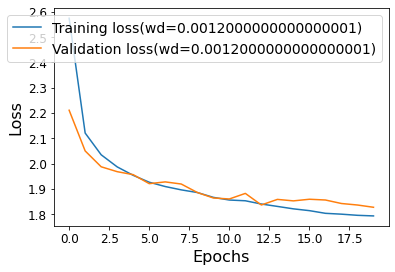

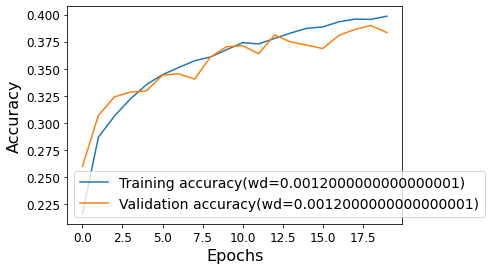

In [7]:
# Iterating through a range of weight decay values
for decay_value in np.arange(0.0002,0.0014,0.0002):


  # Applying L2-norm regularization on 4-layer ANN 
  model_4_wd= Sequential([
                    keras.layers.Flatten(input_shape=(32,32,1)),
                    keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(decay_value)),
                    keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(decay_value)),
                    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(decay_value)),
                    keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(decay_value)),
                    keras.layers.Dense(10, activation='softmax')
  ])


  # Configure ANN optimzer, objective function and metrics to be evaluated
  model_4_wd.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


  # Train model using 20 epochs, batch size of 128 and 20% validation data
  history_4_wd=model_4_wd.fit(X_train_gray, y_train, batch_size=128, epochs=20,validation_split=0.2)


  # Evaluate model against test data
  test_loss_4_wd, test_acc_4_wd = model_4_wd.evaluate(X_test_gray, y_test, verbose=2)
  print(f'\n Test accuracy: {test_acc_4_wd}')

  # Print the average difference between the training and evaluation accuracy
  print(f'Average difference: {sum([abs(i[0]-i[1]) for i in zip(history_4_wd.history["accuracy"],history_4_wd.history["val_accuracy"])])/20}')

  # Compare training and validation loss
  plt.plot(history_4_wd.history['loss'])
  plt.plot(history_4_wd.history['val_loss'])
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Loss', fontsize=16)
  plt.legend([f'Training loss(wd={decay_value})', f'Validation loss(wd={decay_value})'], fontsize=14)
  plt.savefig("loss_vs_epoch_4_wd.pdf")
  plt.show()



  # Plot training and validation accuracy
  plt.plot(history_4_wd.history['accuracy'])
  plt.plot(history_4_wd.history['val_accuracy'])
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy', fontsize=16)
  plt.legend([f'Training accuracy(wd={decay_value})', f'Validation accuracy(wd={decay_value})'], fontsize=14)
  plt.savefig("accuracy_vs_epoch_4_wd.pdf")
  plt.show()

**IMPLEMENTING DROPOUT**

Epoch 1/20
313/313 [==============================] - 6s 19ms/step - loss: 2.6534 - accuracy: 0.1787 - val_loss: 2.2250 - val_accuracy: 0.2556
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 2.1574 - accuracy: 0.2546 - val_loss: 2.0922 - val_accuracy: 0.2772
Epoch 3/20
313/313 [==============================] - 6s 18ms/step - loss: 2.0679 - accuracy: 0.2777 - val_loss: 2.0266 - val_accuracy: 0.2988
Epoch 4/20
313/313 [==============================] - 6s 18ms/step - loss: 2.0277 - accuracy: 0.2932 - val_loss: 1.9799 - val_accuracy: 0.3139
Epoch 5/20
313/313 [==============================] - 6s 18ms/step - loss: 1.9991 - accuracy: 0.3061 - val_loss: 1.9592 - val_accuracy: 0.3205
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 1.9743 - accuracy: 0.3172 - val_loss: 1.9583 - val_accuracy: 0.3205
Epoch 7/20
313/313 [==============================] - 6s 18ms/step - loss: 1.9599 - accuracy: 0.3187 - val_loss: 1.9234 - val_accuracy: 0.3324

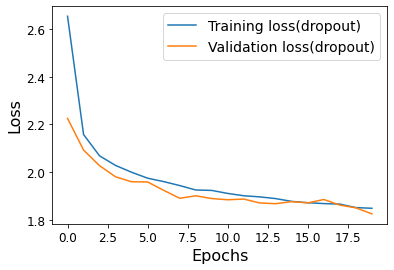

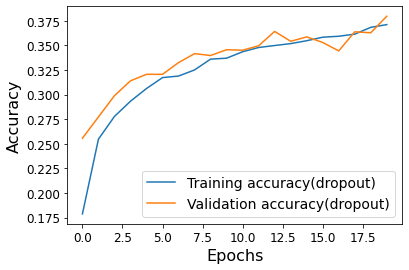

In [8]:
# Define a drop rate of 20%
drop_rate=0.2


# Defining weight decay value
decay_value=0.0012

# Adding dropout layer to 4-layer ANN 
model_4_dropout= Sequential([
                  keras.layers.Flatten(input_shape=(32,32,1)),
                  keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(decay_value)),
                  keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(decay_value)),
                  keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(decay_value)),
                  keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(decay_value)),
                  keras.layers.Dropout(drop_rate, noise_shape=None, seed=None),
                  keras.layers.Dense(10, activation='softmax')
])



# Configure ANN optimzer, objective function and metrics to be evaluated
model_4_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model using 20 epochs, batch size of 128 and 20% validation data
history_4_dropout=model_4_dropout.fit(X_train_gray, y_train, batch_size=128, epochs=20,validation_split=0.2)


# Evaluate model against test data
test_loss_4_dropout, test_acc_4_dropout = model_4_dropout.evaluate(X_test_gray, y_test, verbose=2)
print(f'\n Test accuracy: {test_acc_4_dropout}')


# Compare training and validation loss
plt.plot(history_4_dropout.history['loss'])
plt.plot(history_4_dropout.history['val_loss'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss(dropout)', 'Validation loss(dropout)'], fontsize=14)
plt.savefig("loss_vs_epoch_4_dropout.pdf")
plt.show()



# Plot training and validation accuracy
plt.plot(history_4_dropout.history['accuracy'])
plt.plot(history_4_dropout.history['val_accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy(dropout)', 'Validation accuracy(dropout)'], fontsize=14)
plt.savefig("accuracy_vs_epoch_4_dropout.pdf")
plt.show()